In [1]:
import nltk
import numpy as np
import pandas as pd
from nltk.tokenize import sent_tokenize
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
speeches = pd.read_pickle('data/sotu_content.pkl')

In [3]:
speeches['date'] = pd.to_datetime(speeches['date'])

In [4]:
speeches = speeches[~speeches.duplicated(subset='date')]

In [5]:
def calc_sentiment_scores(df):
    '''
    Takes a dataframe of speeches and returns vader sentiment scores for each speech
    '''
    analyser = SentimentIntensityAnalyzer()
    compound_score = []
    positive_score = []
    neutral_score = []
    negative_score = []
    
    for speech in df.speech:
        snt_dict = {
            'compound':[],
            'pos':[],
            'neg':[],
            'neu':[]
        }
        for sent in sent_tokenize(speech):
            snt = analyser.polarity_scores(sent)
            snt_dict['compound'].append(snt['compound'])
            snt_dict['pos'].append(snt['pos'])
            snt_dict['neg'].append(snt['neg'])
            snt_dict['neu'].append(snt['neu'])
            
        compound_score.append(np.mean(snt_dict['compound']))
        positive_score.append(np.mean(snt_dict['pos']))
        negative_score.append(np.mean(snt_dict['neg']))
        neutral_score.append(np.mean(snt_dict['neu']))
            
    df['compound'] = pd.Series(compound_score,  index=df.index)
    df['positive'] = pd.Series(positive_score,  index=df.index)
    df['negative'] = pd.Series(negative_score,  index=df.index)
    df['neutral'] = pd.Series(neutral_score,  index=df.index)
    
    return df

In [6]:
# df = calc_sentiment_scores(speeches)
df = pd.read_pickle('data/sotu_sentiment_scores.pkl')
df.head()

,date,president,speech,compound,positive,negative,neutral
65,1959-01-09,Dwight D. Eisenhower,[Delivered in person before a joint session] M...,0.275041,0.162559,0.056096,0.781341
66,1958-01-09,Dwight D. Eisenhower,"Mr. President, Mr. Speaker, Members of the 85t...",0.230129,0.156285,0.061402,0.782297
73,1952-01-09,Harry S. Truman,"Mr. President, Mr. Speaker, Members of the Con...",0.229575,0.163072,0.071606,0.765329
59,1964-01-08,Lyndon B. Johnson,[ As delivered in person before a joint sessio...,0.182663,0.130964,0.062645,0.806399
74,1951-01-08,Harry S. Truman,"Mr. President, Mr. Speaker, Members of the Con...",0.231713,0.173522,0.067513,0.758982


In [7]:
# df.to_csv('data/sotu_scores.csv', index=False)

/Users/ratulesrar/anaconda3/lib/python3.5/site-packages/pandas/plotting/_core.py:1716: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


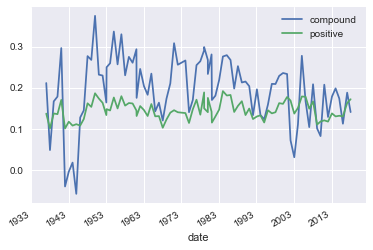

In [8]:
df.plot('date', ['compound', 'positive'])

In [9]:
set(df['president'])

{'Barack Obama',
 'Donald J. Trump',
 'Dwight D. Eisenhower',
 'Franklin D. Roosevelt',
 'George Bush',
 'George W. Bush',
 'Gerald R. Ford',
 'Harry S. Truman',
 'Jimmy Carter',
 'John F. Kennedy',
 'Lyndon B. Johnson',
 'Richard Nixon',
 'Ronald Reagan',
 'William J. Clinton'}